# Example: Using `HelmholtzDecomposition` for Analytical Function

This notebook demonstrates the use of the `HelmholtzDecomposition` class from the provided script to compute the rotational and divergent components of an analytical velocity field.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ADCPySpec.spectrum import SpectrumProcessor
from ADCPySpec.helmholtz import HelmholtzDecomposition

## Define Analytical Inputs

In [38]:
k = np.arange(0,5,1E-4)
Cu = np.exp(-np.pi*k**2)
Cv = .5*np.exp(-np.pi*k**2)
Cuv = np.zeros_like(k)

## Perform Decomposition

In [39]:
# Compute rotational and divergent components
helmholtz = HelmholtzDecomposition(k,Cu,Cv,Cuv)
Cpsi,Cphi = helmholtz.isotropic_decomposition()
print(Cpsi)

/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:74: RuntimeWarning: divide by zero encountered in log
  s = np.log(self.k)
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:88: RuntimeWarning: invalid value encountered in subtract
  sh, ch = sinh(s[i] - s[i:]), cosh(s[i] - s[i:])
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:89: RuntimeWarning: invalid value encountered in add
  Fp = Cu[i:] * sh + Cv[i:] * ch
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/ADCPySpec/helmholtz.py:90: RuntimeWarning: invalid value encountered in add
  Fs = Cv[i:] * sh + Cu[i:] * ch
/opt/miniconda3/envs/calypso/lib/python3.13/site-packages/scipy/integrate/_quadrature.py:527: RuntimeWarning: invalid value encountered in divide
  np.true_divide(hsum, hprod,


[           nan 1.25149998e+03 6.26499652e+02 ... 7.84680426e-35
 7.82211485e-35 7.79750239e-35]


## Visualize the Results

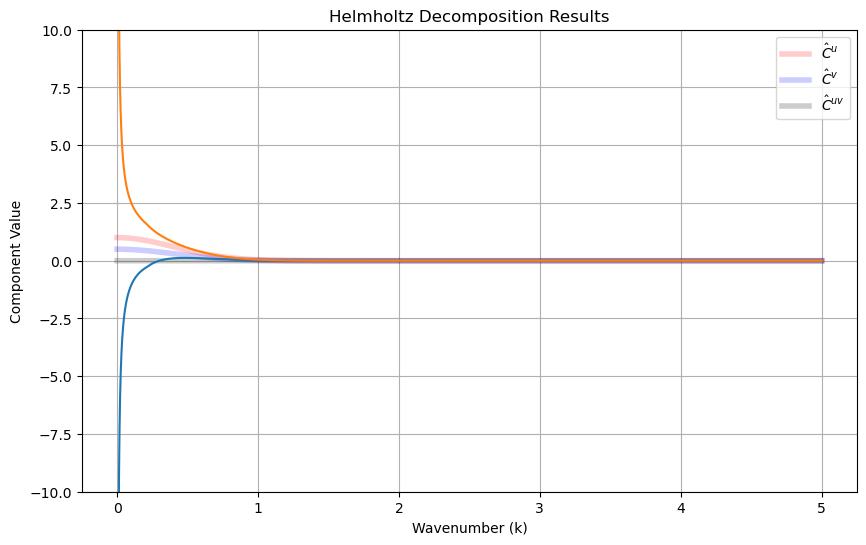

In [41]:
# Plot the components
plt.figure(figsize=(10, 6))
plt.plot(k, Cu, label=r'$\hat C^u$',lw=4,alpha=.2,c="r")
plt.plot(k, Cv, lw=4, alpha=.2, label=r'$\hat C^v$',c="b")
plt.plot(k, Cuv, lw=4, alpha=.2, c="k", label=r'$\hat C^{uv}$')
plt.plot(k, Cphi)
plt.plot(k, Cpsi)
plt.xlabel('Wavenumber (k)')
plt.ylabel('Component Value')
plt.legend()
plt.title('Helmholtz Decomposition Results')
plt.grid()
plt.ylim(-10,10)
plt.show()